abess-universal 算法复杂度证明 技术性条件验证

In [3]:
import math
import matplotlib.pyplot as plt  
import numpy as np
from scipy.optimize import fsolve

f为 $\frac{\mathcal{L}(\tilde{\boldsymbol{\theta}})-\mathcal{L}(\boldsymbol{\theta}^*)}{\mathcal{L}(\hat{\boldsymbol{\theta}})-\mathcal{L}(\boldsymbol{\theta}^*)} $

In [2]:
def f(x, y=None, z=None):
    if y is None:
        y=(1.42-x)*3/7
    if z is None:
        z=(x-1)/2
    d = (1+math.sqrt(x))*math.sqrt((z+y)**2+(y+z*y+z**2+z)**2)
    return (y**2+x*y**2/2+(2*y*z+x*y*z/2+y)*d+(x*z**2/2+z**2+x/2)*d**2) / (0.5-y**2-y*z-y-x*y**2/2-x*y*z-x*z**2/2-y*z-z**2)

首先考察f在现有技术性条件下，是否严格小于1

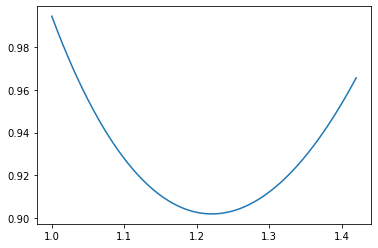

In [7]:
x = np.linspace(1,1.42,1000)
y = np.array([f(i) for i in x])
plt.plot(x,y)

检查f在x接近1时的大小

In [11]:
f(1)

0.9942558542438333

f为 $\mathcal{L}(\hat{\boldsymbol{\theta}})-\mathcal{L}(\boldsymbol{\theta}^*)$

In [1]:
def g(x, y=None, z=None):
    if y is None:
        y=(1.42-x)*3/7
    if z is None:
        z=(x-1)/2
    return 0.5-y**2-y*z-y-x*y**2/2-x*y*z-x*z**2/2-y*z-z**2

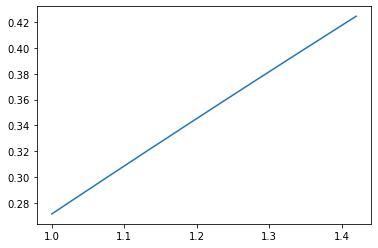

In [4]:
x = np.linspace(1,1.42,1000)
y = np.array([g(i) for i in x])
plt.plot(x,y)

In [5]:
g(1)

0.2714000000000001